In [1]:
import numpy as np
import pandas as pd

In [2]:
credit = pd.read_csv('german_credit_data.csv')

In [3]:
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
credit.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [5]:
del credit['Unnamed: 0']

In [6]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
#plt.rcParams["figure.figsize"] = (20,8)

In [8]:
numerical_credit = credit.select_dtypes(exclude = 'object')
numerical_credit.head()

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24


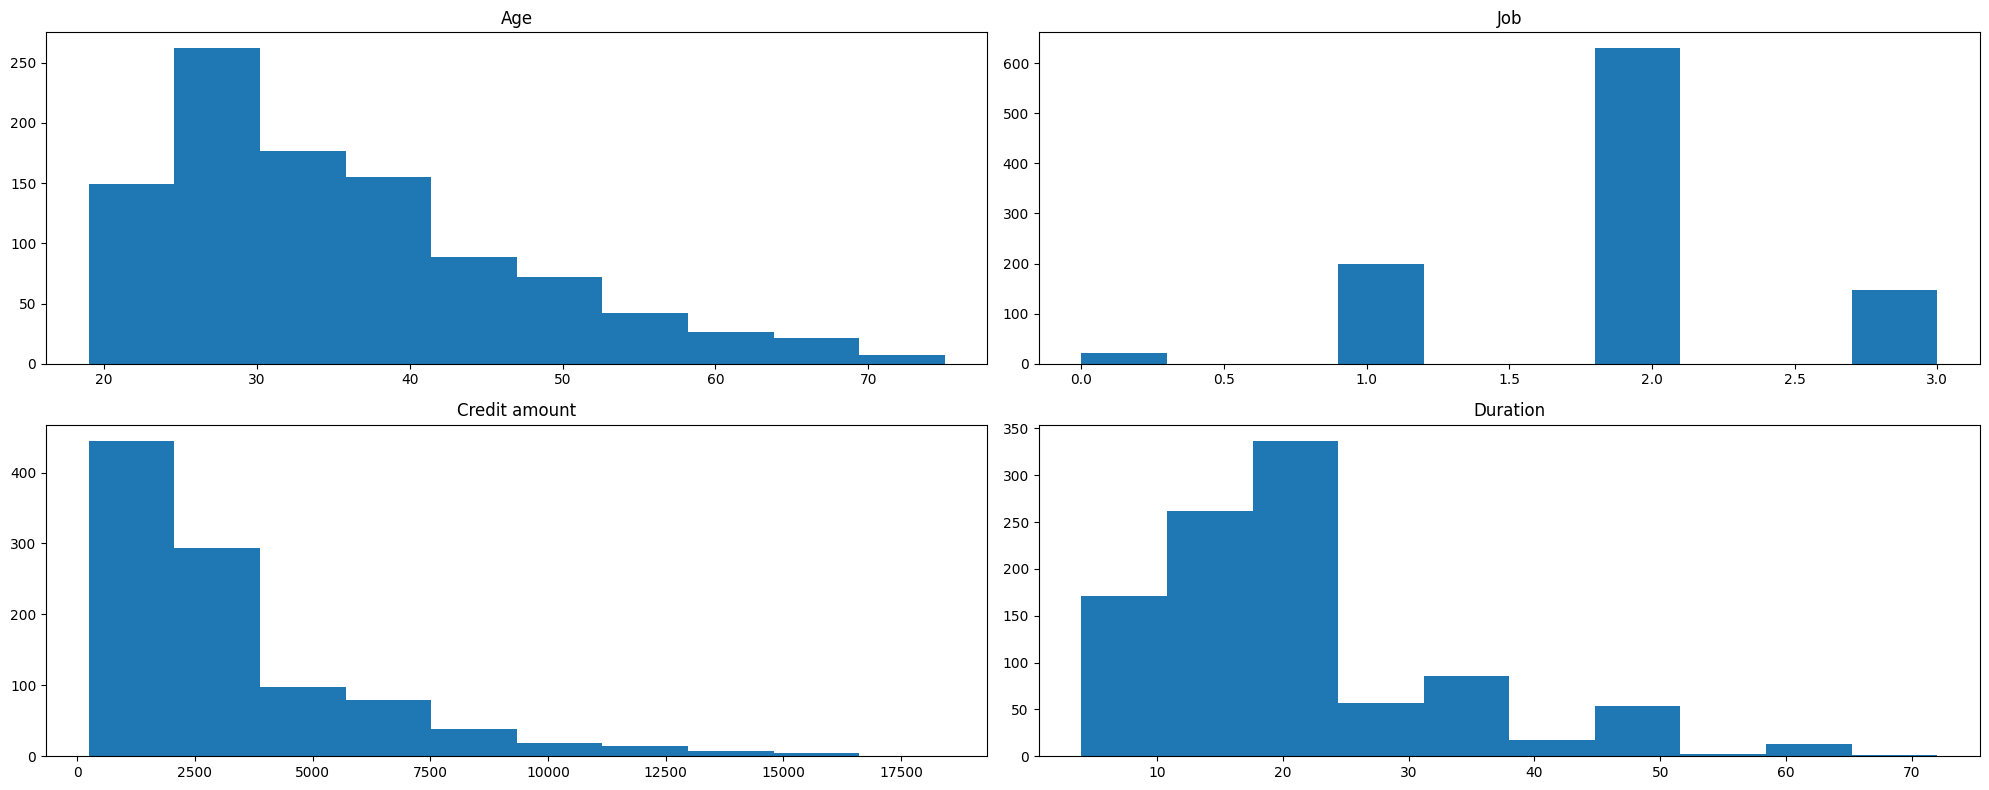

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
k = 0
cols = numerical_credit.columns

for i, j in zip(range(len(cols)), cols):
    k += 1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

plt.tight_layout()
plt.show()

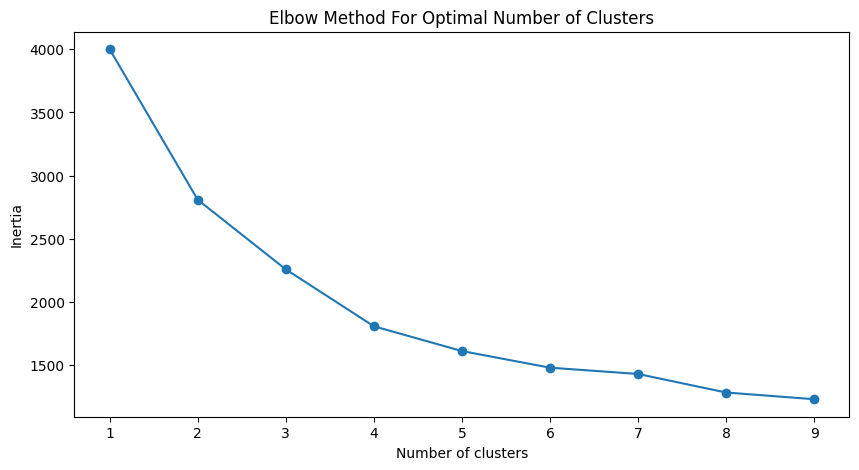

In [10]:
# Elbow method to find the optimal number of clusters

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_credit)

inertia = []
range_clusters = range(1, 10)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

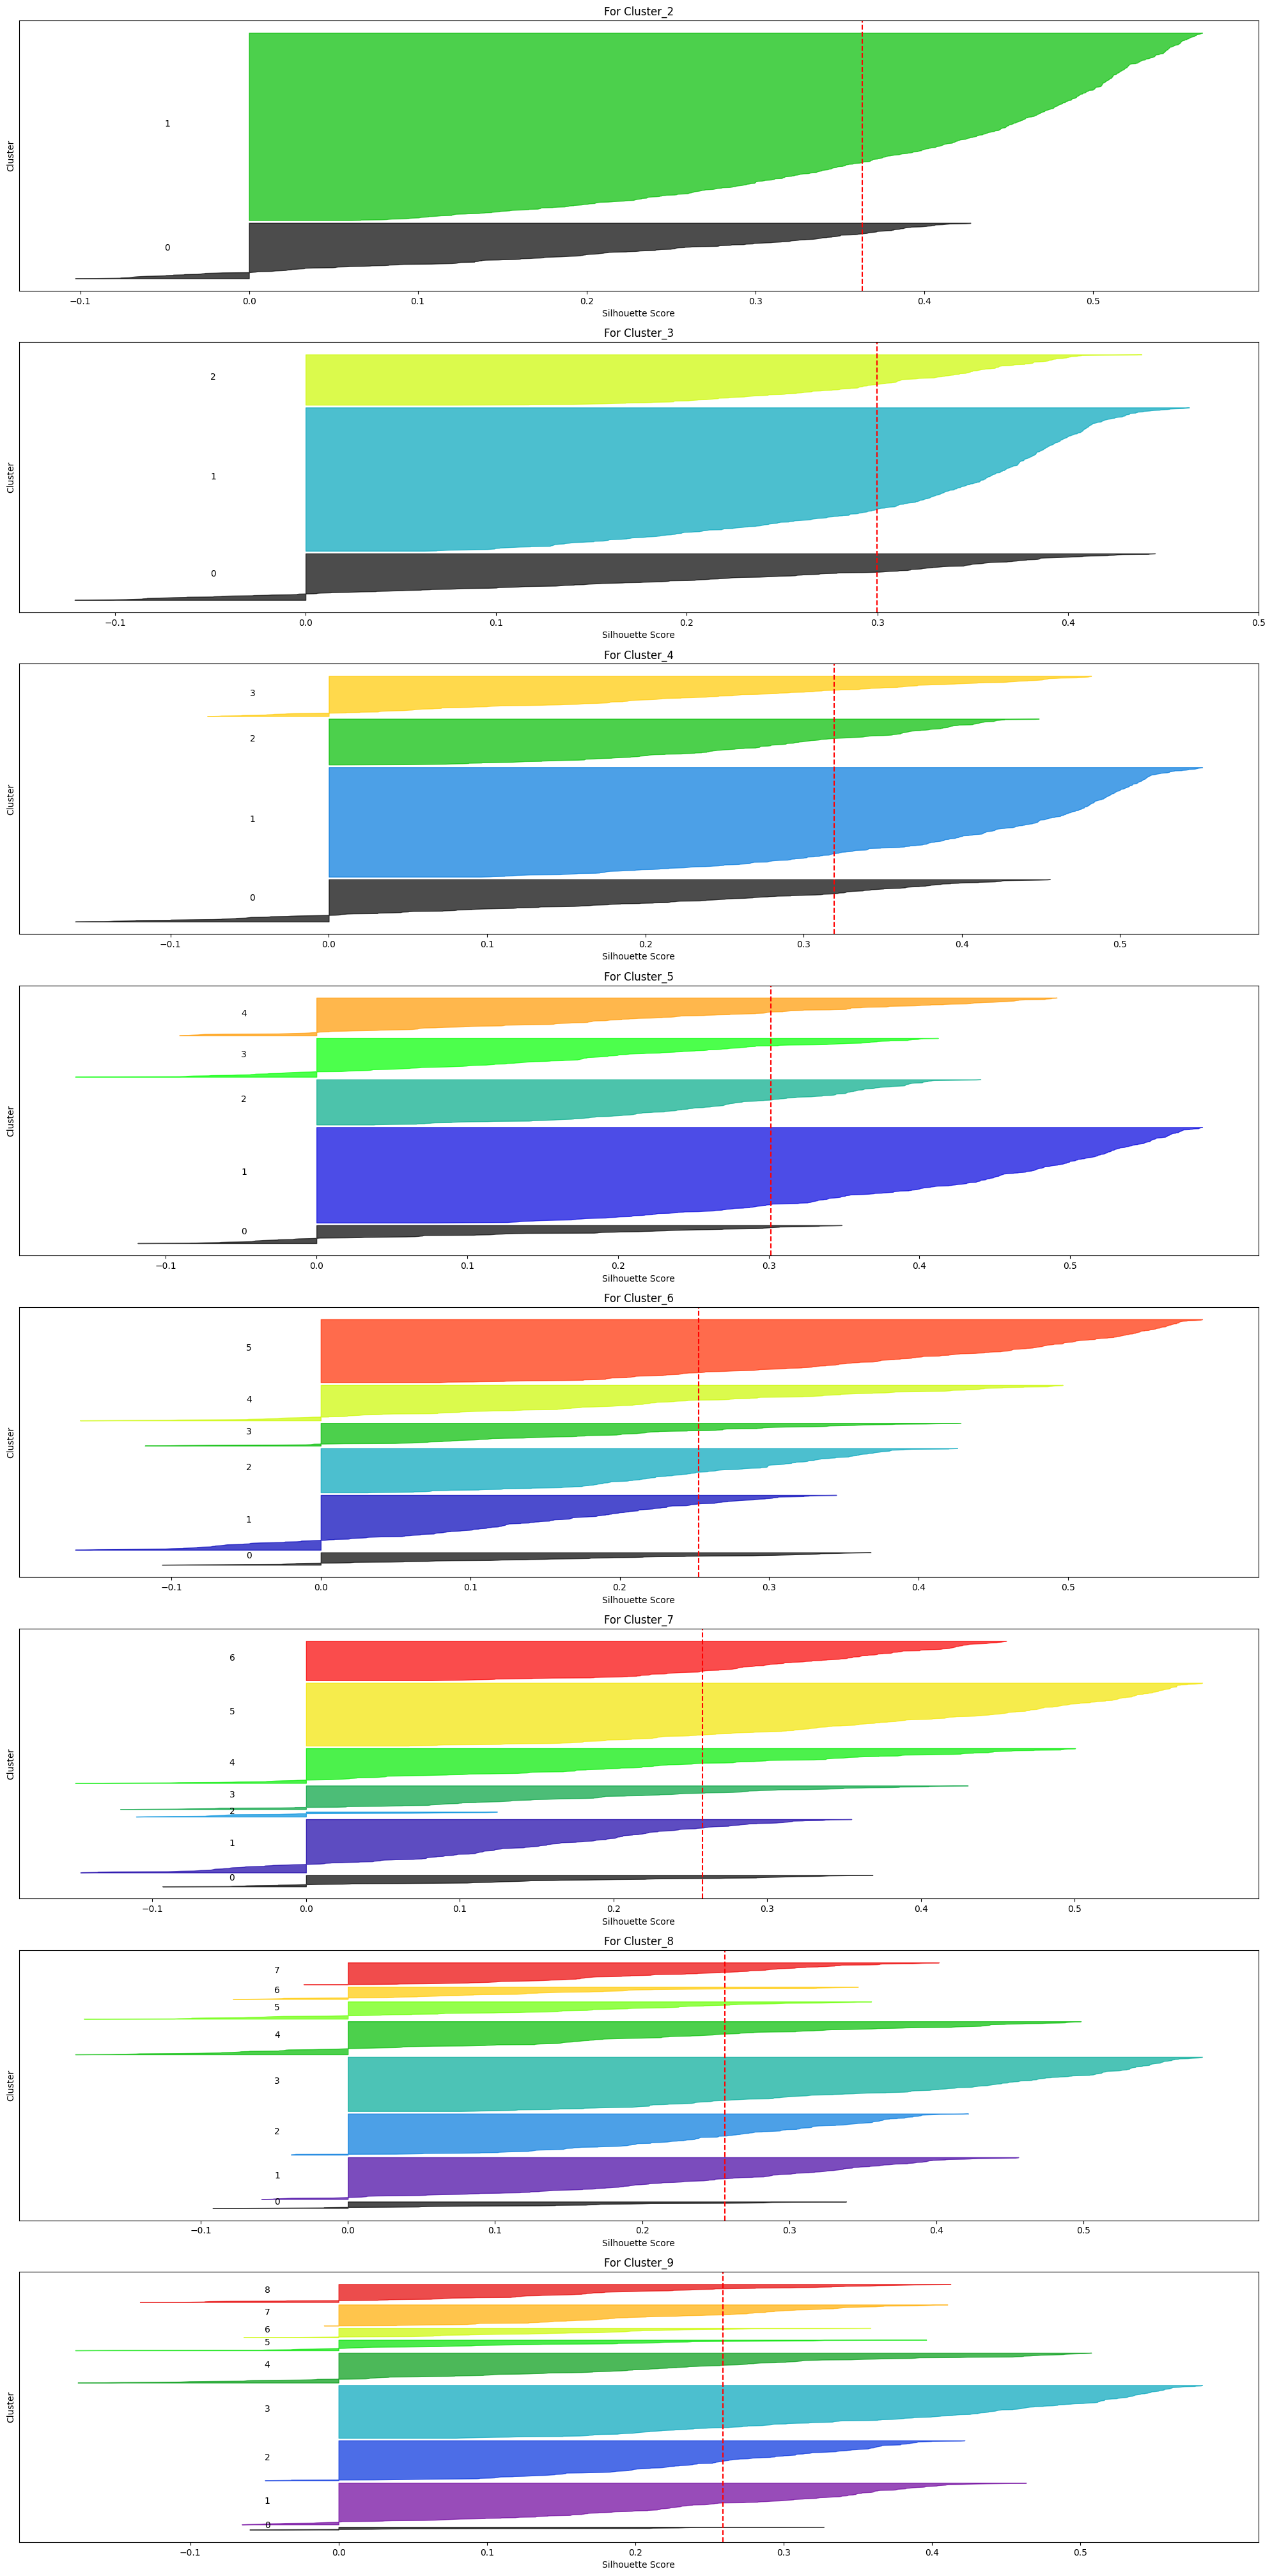

In [11]:
# Silhouette and Calinski-Harabasz scores for cluster configurations from 2 to 10

from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.cm as cm

calinski_harabasz_scores = []
plt.figure(figsize=(20, 45))

for n_clusters in range(2, 10):
    ax = plt.subplot(9, 1, n_clusters - 1)
    
    # Apply KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Silhouette score and Calinski-Harabasz score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(scaled_data, cluster_labels)
    calinski_harabasz_scores.append(calinski_harabasz)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
    
    ax.set_title(f'For Cluster_{n_clusters}')
    ax.set_xlabel('Silhouette Score')
    ax.set_ylabel('Cluster')
    
    ax.axvline(x=silhouette_avg, color='red', linestyle='--')
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 0.6, 0.1))

plt.tight_layout()
plt.show()


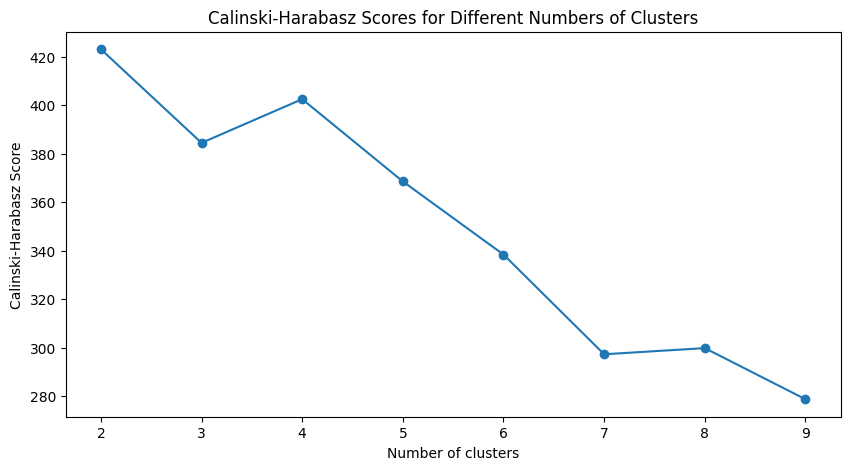

In [12]:
# Plot Calinski-Harabasz Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.show()

Optimal number of clusters: 9


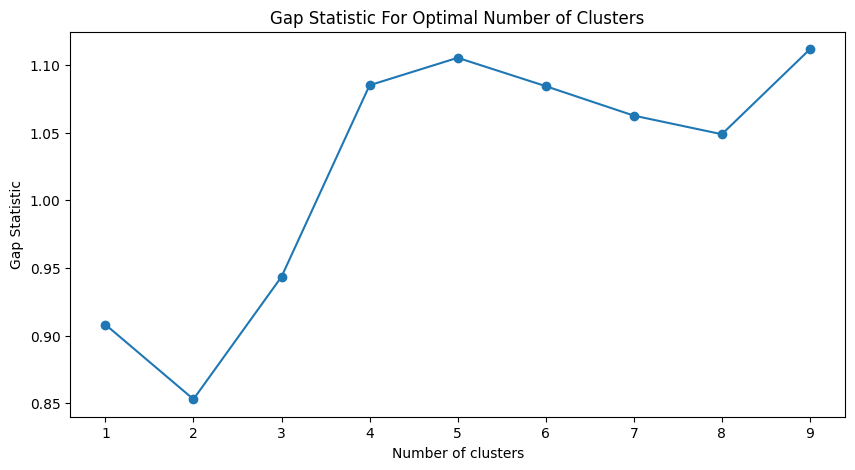

In [13]:
# Gap Statistic Method
from gap_statistic import OptimalK
# Gap Statistic Method
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(scaled_data, cluster_array=np.arange(1, 10))
print(f'Optimal number of clusters: {n_clusters}')

# Plot the gap statistic results
gap_result = optimalK.gap_df
plt.figure(figsize=(10, 5))
plt.plot(gap_result.n_clusters, gap_result.gap_value, marker='o')
plt.title('Gap Statistic For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Gap Statistic')
plt.show()

In [14]:
gap_result.head()

,n_clusters,gap_value,ref_dispersion_std,sk,gap*,sk*,diff,diff*
0,1.0,0.908170,20.835410,0.002425,5919.144867,6834.882108,0.127471,6636.139852
1,2.0,0.852941,491.058647,0.072242,4432.306352,5149.301337,-0.048321,5044.435727
2,3.0,0.943513,230.812949,0.042250,3906.008862,4518.138237,-0.114219,4457.913068
3,4.0,1.085152,126.793335,0.027421,3550.672465,4102.576670,-0.000337,4055.553805
4,5.0,1.105468,84.431655,0.019980,3255.433267,3760.314607,0.040021,3708.199112


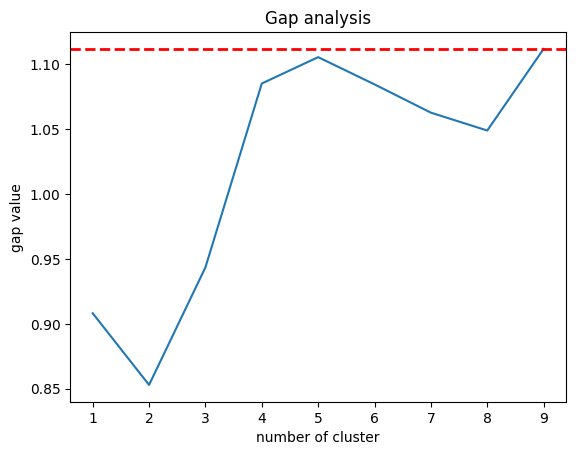

In [15]:
import matplotlib.pyplot as plt
plt.plot(gap_result.n_clusters , gap_result.gap_value)
min_ylim , max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color = 'r',
linestyle = 'dashed', linewidth=2)
plt.title('Gap analysis')
plt.xlabel('number of cluster')
plt.ylabel('gap value')
plt.show()

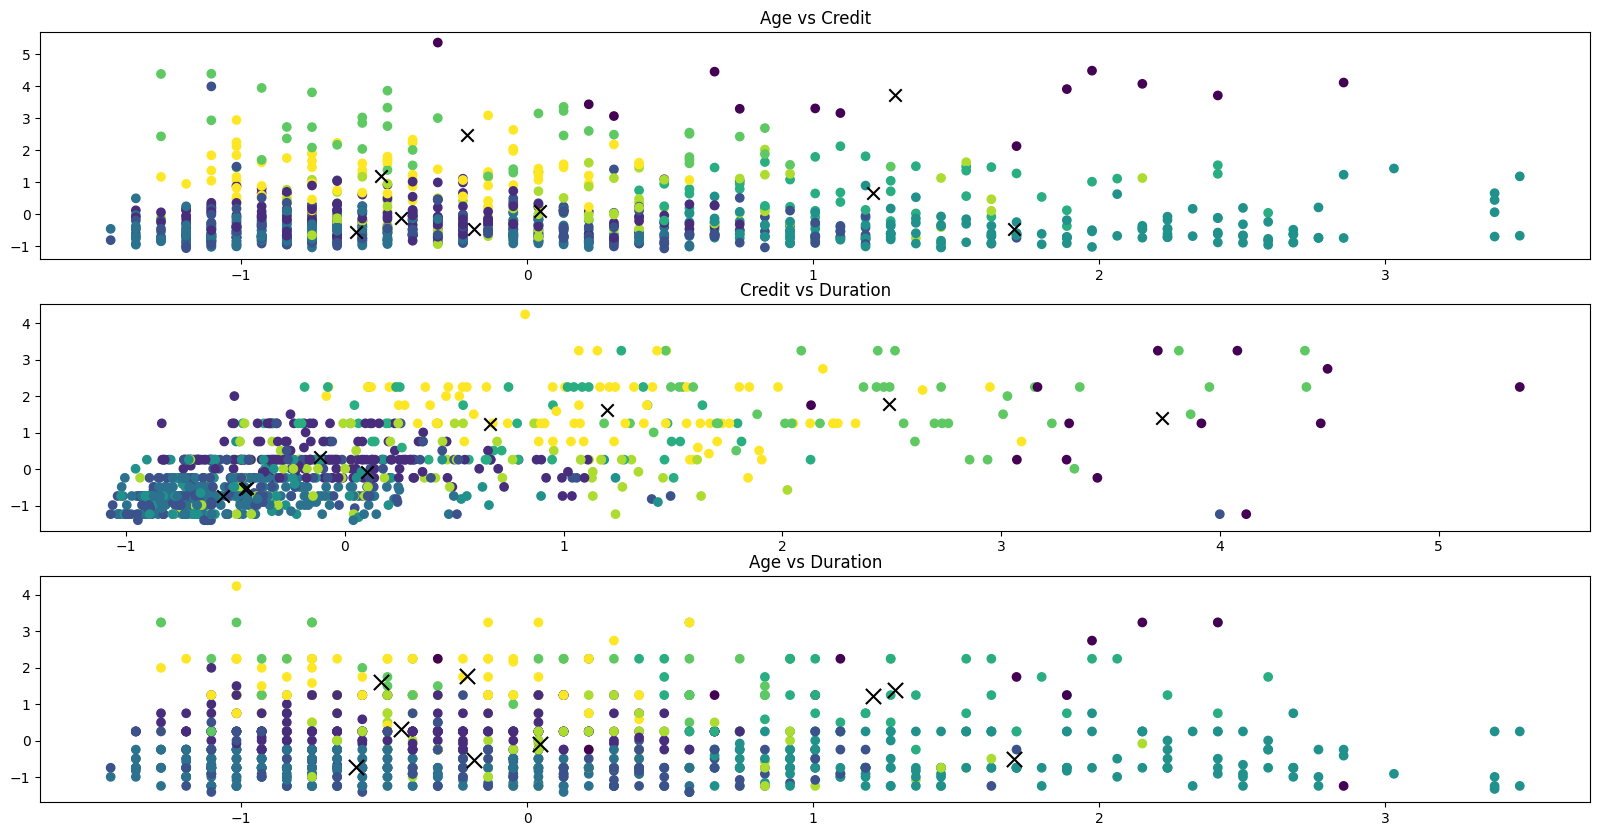

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.scatter(scaled_data[:,0], scaled_data[:,2],
            c = kmeans.labels_, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,2], s = 80,
            marker = 'x', color = 'k')
plt.title("Age vs Credit")
plt.subplot(312)
plt.scatter(scaled_data[:,2], scaled_data[:,-1],
            c = kmeans.labels_, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,2],
            kmeans.cluster_centers_[:,-1], s = 80,
            marker = 'x', color = 'k')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_data[:,0], scaled_data[:,3],
            c = kmeans.labels_, cmap = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,3], s = 120,
            marker = 'x', color = 'k')
plt.title('Age vs Duration')
plt.show()
